In [1]:
# Curso de CFD de Lorena Barba.
# https://github.com/barbagroup/CFDPython

import numpy as np
import matplotlib.pyplot as plt
import time, sys

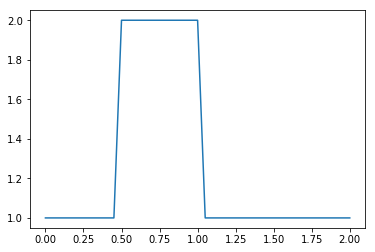

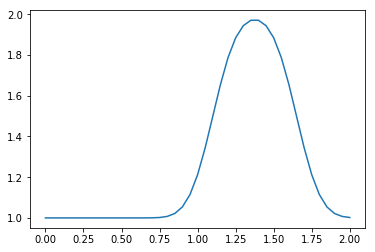

In [6]:
# Step 1

nx = 41
dx = 2 / (nx - 1)
nt = 25
dt = .025
c = 1

u = np.ones(nx)
u[int(.5 / dx):int(1 / dx + 1)] = 2

plt.plot(np.linspace(0,2,nx),u)
plt.show()

un = np.ones(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    
plt.plot(np.linspace(0,2,nx),u)
plt.show()

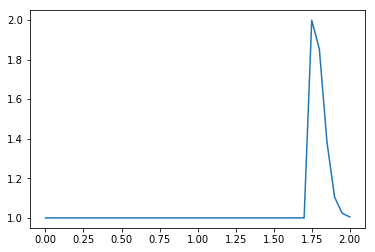

In [9]:
# Step 2

nx = 41
dx = 2 / (nx - 1)
nt = 25
dt = .025
c = 1

u = np.ones(nx)
u[int(.5 / dx):int(1 / dx + 1)] = 2

un = np.ones(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    
plt.plot(np.linspace(0,2,nx),u)
plt.show()

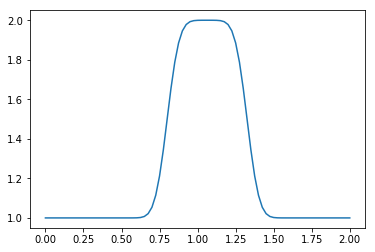

In [11]:
# CFL Condition

def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 25
    c = 1
    sigma = .5
    
    dt = sigma * dx

    u = np.ones(nx)
    u[int(.5 / dx):int(1 / dx + 1)] = 2

    un = np.ones(nx)

    for n in range(nt):
        un = u.copy()
        for i in range(1,nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    
    plt.plot(np.linspace(0,2,nx),u)
    plt.show()
    
linearconv(81)

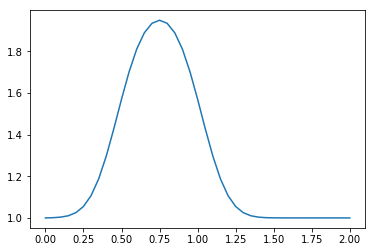

In [16]:
# Step 3

nx = 41
dx = 2 / (nx - 1)
nt = 20
nu = 0.3
sigma = .2
dt = sigma * dx**2 / nu

u = np.ones(nx)
u[int(.5 / dx):int(1 / dx + 1)] = 2

un = np.ones(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
    
plt.plot(np.linspace(0,2,nx),u)
plt.show()

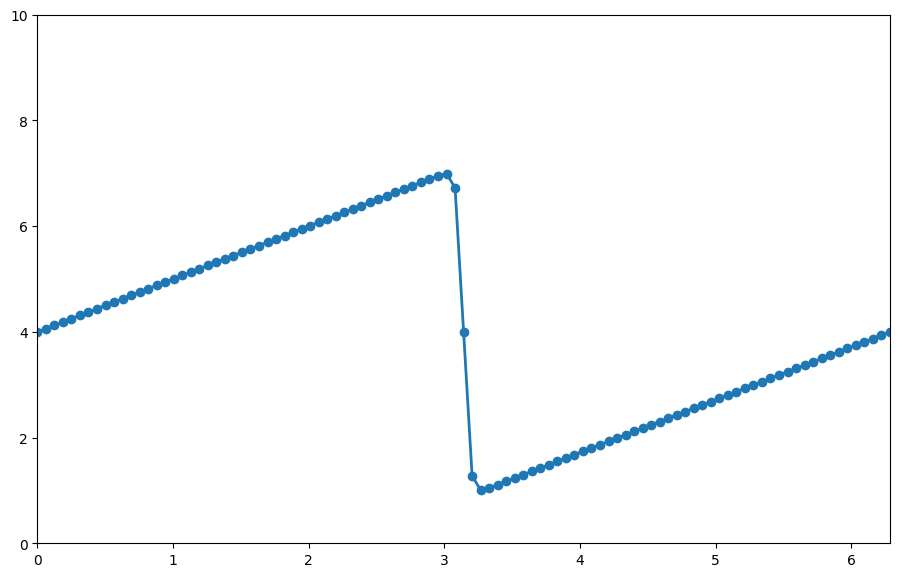

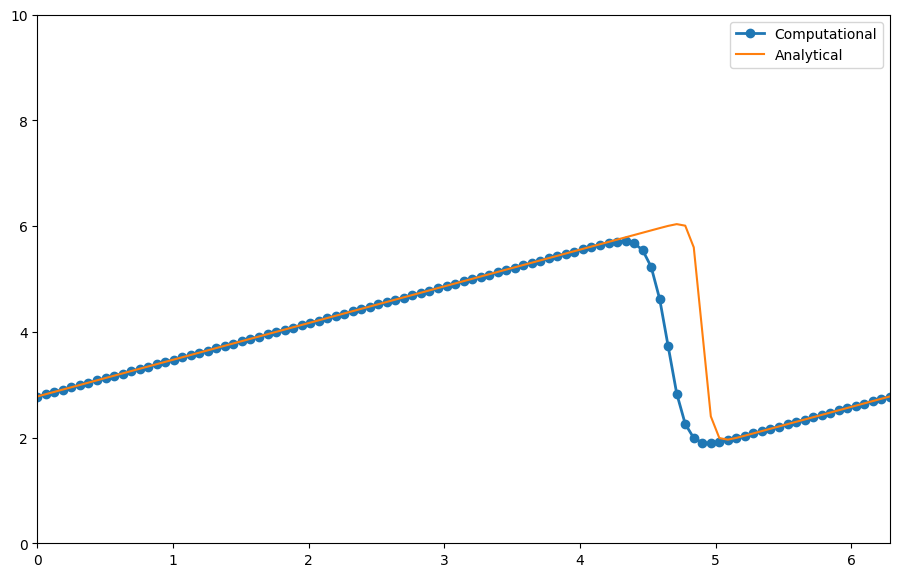

In [34]:
# Step 4

import sympy
from sympy import init_printing
from sympy.utilities.lambdify import lambdify


init_printing(use_latex=True)

x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * np.pi)**2 / (4 * nu * (t + 1))))


phiprime = phi.diff(x)

u = -2 * nu * (phiprime / phi) + 4

ufunc = lambdify((t, x, nu), u)

nx = 101
nt = 100
dx = 2 * np.pi / (nx - 1)
nu = .07
dt = dx * nu

x = np.linspace(0, 2 * np.pi, nx)
un = np.empty(nx)
t = 0

u = np.asarray([ufunc(t, x0, nu) for x0 in x])

plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o', lw=2)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10]);
plt.show()

for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])

plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x,u, marker='o', lw=2, label='Computational')
plt.plot(x, u_analytical, label='Analytical')
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])
plt.legend();
plt.show()